# CIFAR10 Classfier: Optuna Edition


Author: Katnoria | Created: 18-Oct-2020

# 1. Imports & Setup 

In [1]:
import pickle
from time import time
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import Model
import IPython
import optuna

In [2]:
def version_info(cls):
    print(f"{cls.__name__}: {cls.__version__}")

In [3]:
print("Version Used in this Notebook:")
version_info(tf)
version_info(tfds)
version_info(optuna)

Version Used in this Notebook:
tensorflow: 2.3.0
tensorflow_datasets: 3.2.1
optuna: 2.2.0


In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# 2. Dataset

Tensorflow Datasets already provides this dataset in a format that we can use out of the box.

In [5]:
# Load the dataset
(ds_train, ds_test), metadata = tfds.load(
    'cifar10', split=['train', 'test'], shuffle_files=True, 
    with_info=True, as_supervised=True
)

In [6]:

IMG_SIZE = 32
NUM_CLASSES = metadata.features["label"].num_classes
print(f"Classes: {NUM_CLASSES}")

Classes: 10


In [7]:
IMG_SIZE = 32
# test
train_ds = ds_train \
    .cache() \
    .batch(1, drop_remainder=True) \
    .prefetch(tf.data.experimental.AUTOTUNE) 

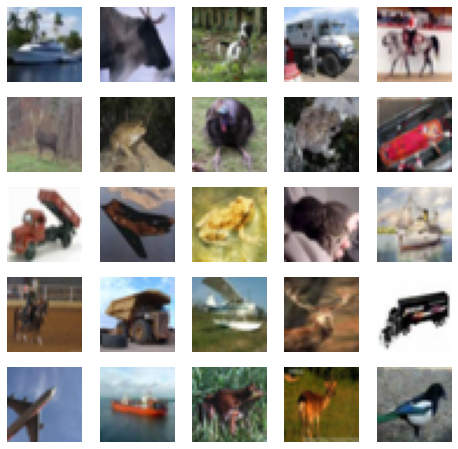

In [8]:
examples = ds_train.take(64)

fig, axs = plt.subplots(5, 5, figsize=(8,8))

for record, ax in zip(examples, axs.flat):
    image, _ = record
    ax.imshow(image)
    ax.axis('off')
plt.show()    

In [9]:
# we no longer need it
del train_ds

In [11]:
# Base Model
base_model = tf.keras.applications.ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False)
base_model.trainable = False

https://github.com/optuna/optuna/blob/master/examples/tensorflow_eager_simple.py

## Dataset

Get CIFAR-10 Dataset

In [ ]:
## Create Model
## Create Optimizer
## Learn
## Define Objective

**The best test accuracy is 68.67%, which is slightly better than our baseline**

Keras-Tuner also supports bayesian optimization to search the best model (BayesianOptimization Tuner). You could give it a try too.

# 5. Conclusion

We saw that best architecture does not use any image augmentations 😂 and `selu` seems to be the activation that keeps showing up.

Here are a few things that we could try:
- additional image augmentation search
- search the pooling options (Global Average, Global Max Pooling)
- add batchnorm?
- add more layers?
